In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sns

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
sc.set_figure_params(dpi=100, frameon=False, color_map='Reds', fontsize=10)
sc.logging.print_header()

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.19.1 scipy==1.5.2 pandas==1.1.1 scikit-learn==0.23.2 statsmodels==0.11.1 python-igraph==0.8.3 leidenalg==0.8.3


In [4]:
%%time
adata = sc.read('/storage/groups/ml01/workspace/yuge.ji/covid-perturbation/data/210118_filtered.h5ad')

CPU times: user 1min 31s, sys: 8.48 s, total: 1min 39s
Wall time: 1min 39s


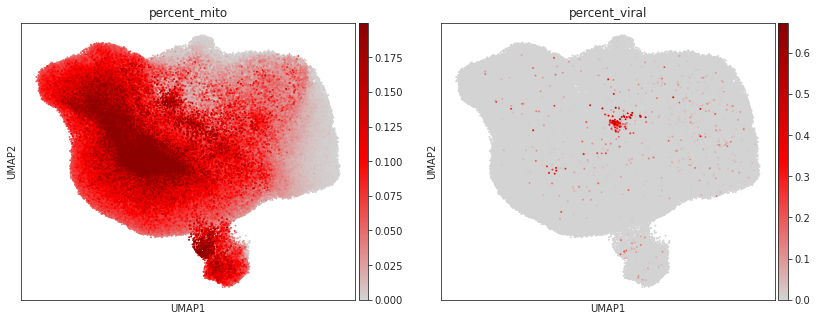

In [100]:
sc.pl.umap(adata, color = ["percent_mito", "percent_viral"], cmap = gray_red, size = 15)

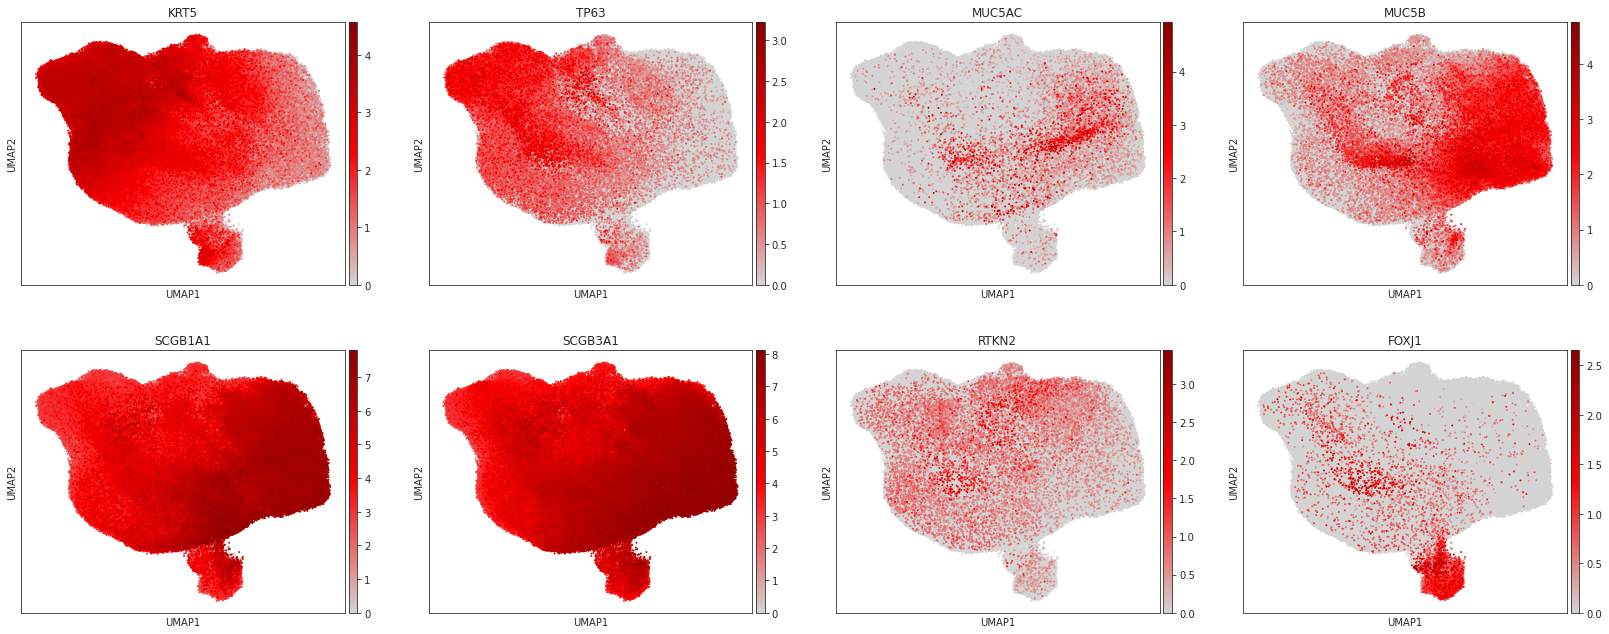

In [101]:
sc.pl.umap(adata, color = ["KRT5", "TP63", "MUC5AC", "MUC5B", "SCGB1A1", "SCGB3A1",
                           "RTKN2", "FOXJ1"], cmap = gray_red, size = 15)

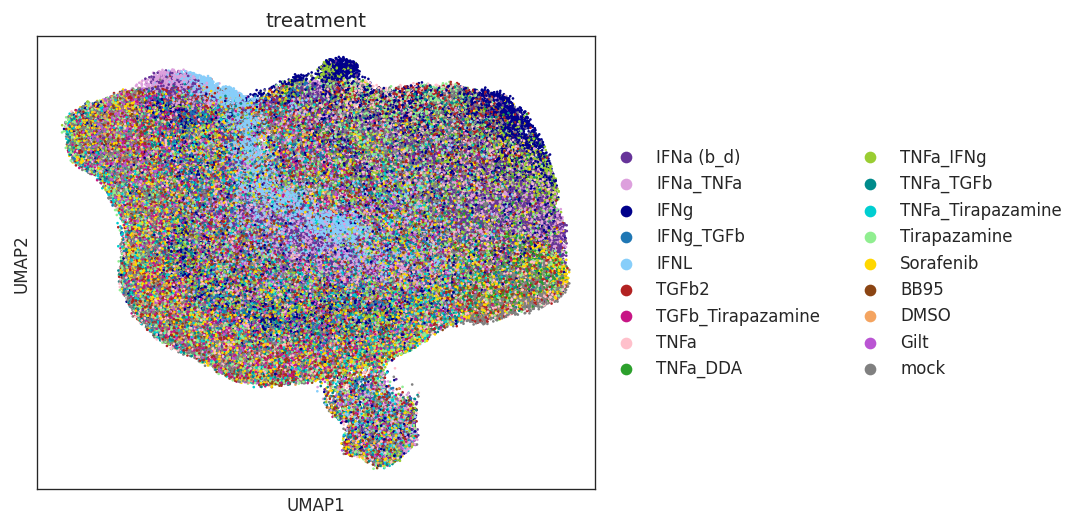

In [106]:
pal = [ "rebeccapurple", "plum", "darkblue", "tab:blue", "lightskyblue", "firebrick", "mediumvioletred", "pink",
           "tab:green", "yellowgreen", "darkcyan", "darkturquoise", "lightgreen", "gold", "saddlebrown",
           "sandybrown", "mediumorchid", "gray"]

sc.pl.umap(adata, color = ["treatment"], ax = mysize(6, 5, 120), size = 10, palette = pal)

In [108]:
adata.obs.treatment.cat.categories

Index(['IFNa (b_d)', 'IFNa_TNFa', 'IFNg', 'IFNg_TGFb', 'IFNL', 'TGFb2',
       'TGFb_Tirapazamine', 'TNFa', 'TNFa_DDA', 'TNFa_IFNg', 'TNFa_TGFb',
       'TNFa_Tirapazamine', 'Tirapazamine', 'Sorafenib', 'BB95', 'DMSO',
       'Gilt', 'mock'],
      dtype='object')

### Highlight each Treatment

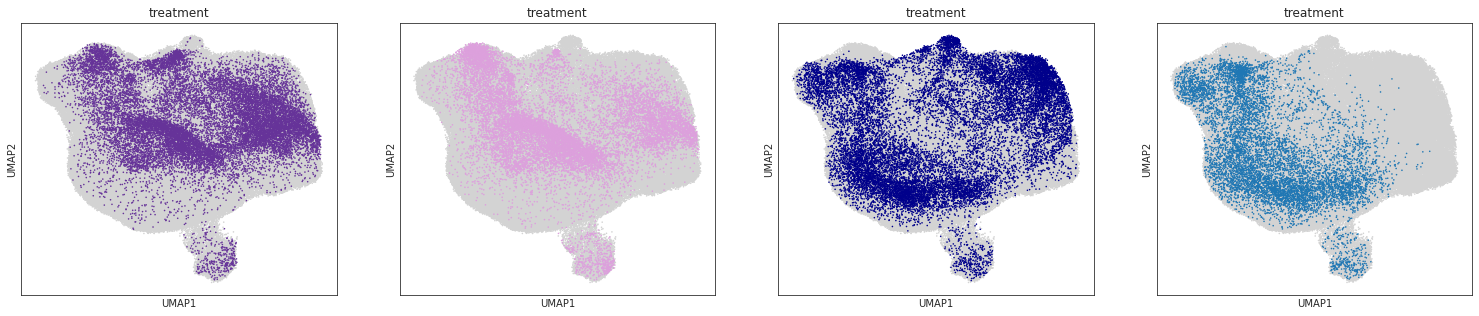

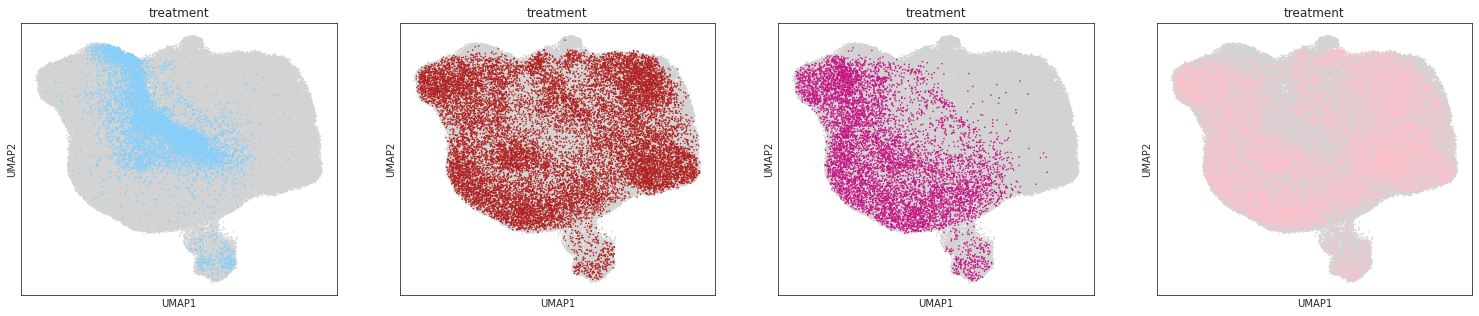

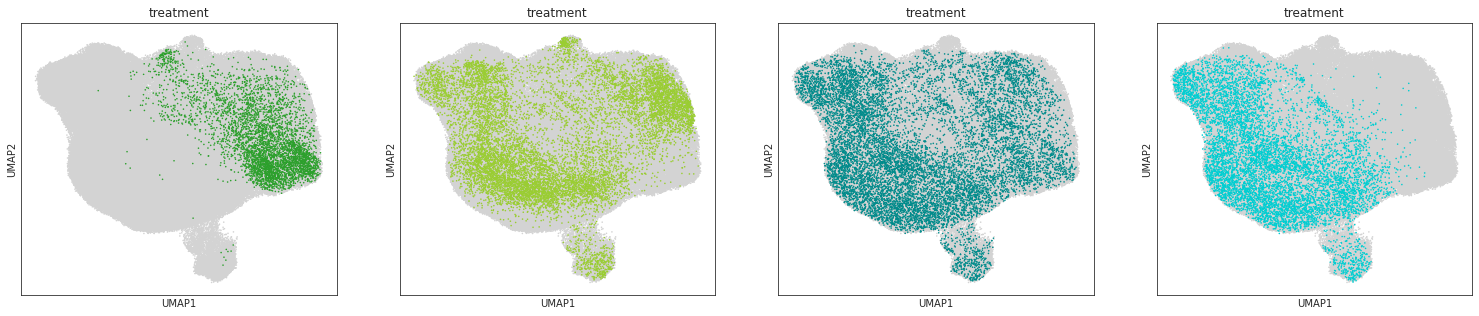

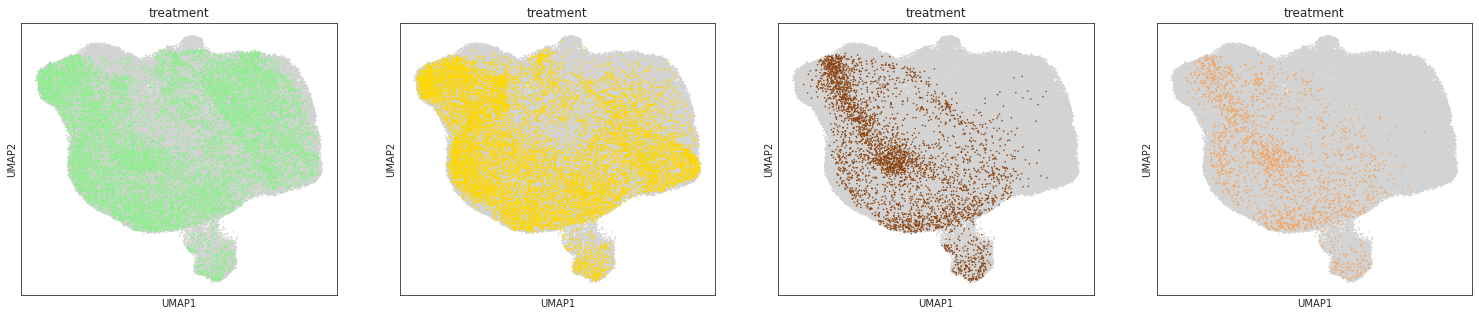

In [115]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(26, 5))
#axs.ravel()
for i, treat in enumerate(['IFNa (b_d)', 'IFNa_TNFa', 'IFNg', 'IFNg_TGFb']):
    sc.pl.umap(adata, color = ["treatment"], groups = [treat], size = 10, legend_loc = None, ax = axs[i], show = False)
plt.show()

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(26, 5))
for i, treat in enumerate(['IFNL', 'TGFb2', 'TGFb_Tirapazamine', 'TNFa']):
    sc.pl.umap(adata, color = ["treatment"], groups = [treat], size = 10, legend_loc = None, ax = axs[i], show = False)
plt.show()

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(26, 5))
for i, treat in enumerate(['TNFa_DDA', 'TNFa_IFNg', 'TNFa_TGFb', 'TNFa_Tirapazamine']):
    sc.pl.umap(adata, color = ["treatment"], groups = [treat], size = 10, legend_loc = None, ax = axs[i], show = False)
plt.show()

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(26, 5))
for i, treat in enumerate(['Tirapazamine', 'Sorafenib', 'BB95', 'DMSO']):
    sc.pl.umap(adata, color = ["treatment"], groups = [treat], size = 10, legend_loc = None, ax = axs[i], show = False)
plt.show()

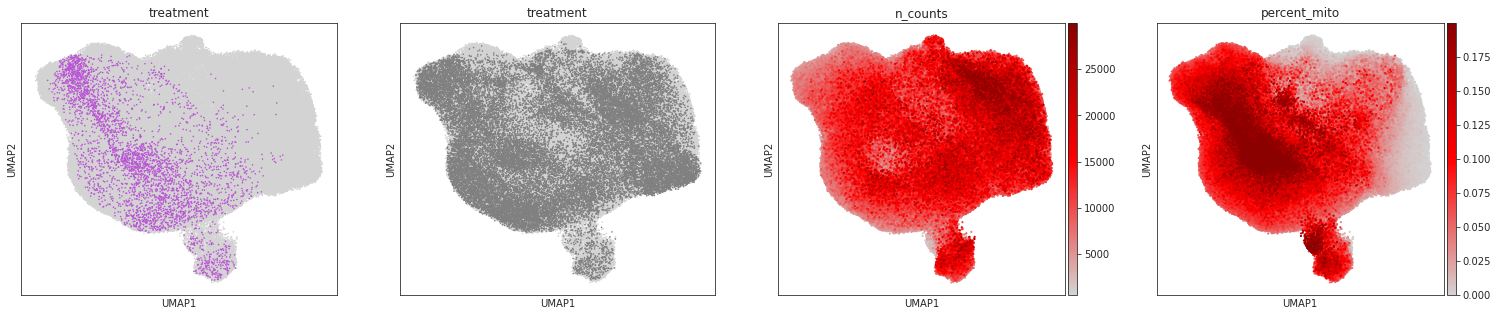

In [116]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(26, 5))
#axs.ravel()
for i, treat in enumerate(['Gilt', 'mock']):
    sc.pl.umap(adata, color = ["treatment"], groups = [treat], size = 10, legend_loc = None, ax = axs[i], show = False)

sc.pl.umap(adata, color = ["n_counts"], cmap = gray_red, size = 20, ax = axs[2], show = False)
sc.pl.umap(adata, color = ["percent_mito"], cmap = gray_red, size = 20, ax = axs[3], show = False)
plt.show()

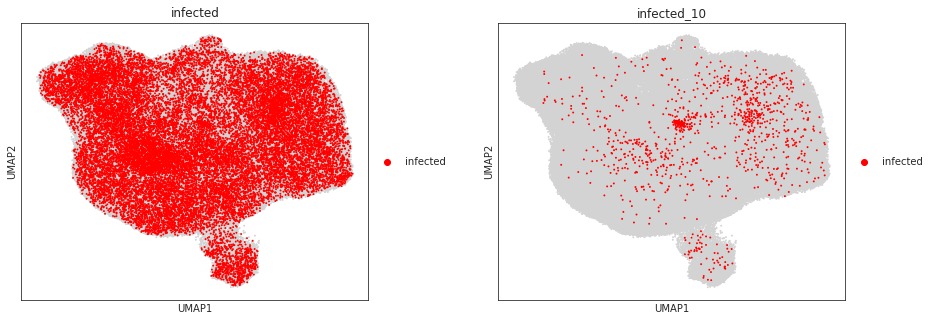

In [123]:
adata.obs["infected"] = ["infected" if nv > 0 else "non-infected" for nv in adata.obs.viral_counts]
adata.obs["infected_10"] = ["infected" if nv > 10 else "non-infected" for nv in adata.obs.viral_counts]

sc.pl.umap(adata, color = ["infected", "infected_10"], size = 15, groups = ["infected"], 
           wspace = 0.25, palette = ["red", "lightgray"])

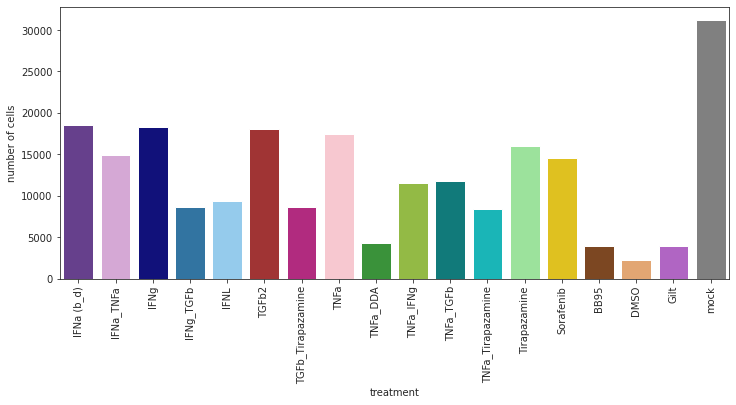

In [125]:
## Barplot
counts = adata.obs.treatment.value_counts().reset_index()
counts.columns = ["treatment", "number of cells"]

fig, ax = plt.subplots(figsize = (12, 5))
fig = sns.barplot(data = counts, x = "treatment", y = "number of cells", palette = adata.uns["treatment_colors"])
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.show()

In [129]:
## Save this as a separate Object
adata.write(folder + "201207_covid19_ALI_assigned.h5ad")